In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
file = open('./wiki-Vote.txt', 'r', encoding='utf-8', errors='ignore')
data = file.read()
file.close()

In [5]:
data = data.splitlines()
data

['# Directed graph (each unordered pair of nodes is saved once): Wiki-Vote.txt ',
 '# Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.',
 '# Nodes: 7115 Edges: 103689',
 '# FromNodeId\tToNodeId',
 '30\t1412',
 '30\t3352',
 '30\t5254',
 '30\t5543',
 '30\t7478',
 '3\t28',
 '3\t30',
 '3\t39',
 '3\t54',
 '3\t108',
 '3\t152',
 '3\t178',
 '3\t182',
 '3\t214',
 '3\t271',
 '3\t286',
 '3\t300',
 '3\t348',
 '3\t349',
 '3\t371',
 '3\t567',
 '3\t581',
 '3\t584',
 '3\t586',
 '3\t590',
 '3\t604',
 '3\t611',
 '3\t8283',
 '25\t3',
 '25\t6',
 '25\t8',
 '25\t19',
 '25\t23',
 '25\t28',
 '25\t29',
 '25\t30',
 '25\t33',
 '25\t35',
 '25\t50',
 '25\t54',
 '25\t55',
 '25\t75',
 '25\t80',
 '25\t86',
 '25\t94',
 '25\t127',
 '25\t152',
 '25\t154',
 '25\t182',
 '25\t192',
 '25\t214',
 '25\t224',
 '25\t226',
 '25\t246',
 '25\t252',
 '25\t255',
 '25\t257',
 '25\t261',
 '25\t271',
 '25\t273',
 '25\t280',
 '25\t282',
 

In [6]:
data = data[3:]
data 

['# FromNodeId\tToNodeId',
 '30\t1412',
 '30\t3352',
 '30\t5254',
 '30\t5543',
 '30\t7478',
 '3\t28',
 '3\t30',
 '3\t39',
 '3\t54',
 '3\t108',
 '3\t152',
 '3\t178',
 '3\t182',
 '3\t214',
 '3\t271',
 '3\t286',
 '3\t300',
 '3\t348',
 '3\t349',
 '3\t371',
 '3\t567',
 '3\t581',
 '3\t584',
 '3\t586',
 '3\t590',
 '3\t604',
 '3\t611',
 '3\t8283',
 '25\t3',
 '25\t6',
 '25\t8',
 '25\t19',
 '25\t23',
 '25\t28',
 '25\t29',
 '25\t30',
 '25\t33',
 '25\t35',
 '25\t50',
 '25\t54',
 '25\t55',
 '25\t75',
 '25\t80',
 '25\t86',
 '25\t94',
 '25\t127',
 '25\t152',
 '25\t154',
 '25\t182',
 '25\t192',
 '25\t214',
 '25\t224',
 '25\t226',
 '25\t246',
 '25\t252',
 '25\t255',
 '25\t257',
 '25\t261',
 '25\t271',
 '25\t273',
 '25\t280',
 '25\t282',
 '25\t286',
 '25\t299',
 '25\t300',
 '25\t302',
 '25\t306',
 '25\t308',
 '25\t310',
 '25\t322',
 '25\t325',
 '25\t339',
 '25\t348',
 '25\t349',
 '25\t356',
 '25\t358',
 '25\t363',
 '25\t370',
 '25\t371',
 '25\t373',
 '25\t377',
 '25\t379',
 '25\t407',
 '25\t415',
 '25\t

In [7]:
df_data = [row.split('\t') for row in data[1:]] 
df = pd.DataFrame(df_data,columns=['from_node','to_node'])

In [8]:
df.head()

,from_node,to_node
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [9]:
df['from_node'] = [int(i) for i in df['from_node']]
df['to_node'] = [int(i) for i in df['to_node']]

### Representing the network in terms of its Adjacency Matrix

In [70]:
x = np.sort(df['from_node'].unique())
y = np.sort(df['to_node'].unique())

z = np.union1d(x, y)

adj_matrix = pd.DataFrame(index=z,columns=z)

for col in adj_matrix.columns:
    adj_matrix[col].values[:] = 0


for i in range(df.shape[0]):
  fn = df.iloc[i]['from_node'].astype(int)
  tn = df.iloc[i]['to_node'].astype(int)
  adj_matrix.at[fn,tn]=1

In [11]:
adj_matrix

,3,4,5,6,7,8,9,10,11,12,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Representing the network in terms of its Edge List

In [12]:
edge_list = []

for i in range(0,len(df)):
  fn = df['from_node'][i]
  tn = df['to_node'][i]
  temp = []
  temp.append(fn)
  temp.append(tn)
  edge_list.append(temp)

In [13]:
edge_list

[[30, 1412],
 [30, 3352],
 [30, 5254],
 [30, 5543],
 [30, 7478],
 [3, 28],
 [3, 30],
 [3, 39],
 [3, 54],
 [3, 108],
 [3, 152],
 [3, 178],
 [3, 182],
 [3, 214],
 [3, 271],
 [3, 286],
 [3, 300],
 [3, 348],
 [3, 349],
 [3, 371],
 [3, 567],
 [3, 581],
 [3, 584],
 [3, 586],
 [3, 590],
 [3, 604],
 [3, 611],
 [3, 8283],
 [25, 3],
 [25, 6],
 [25, 8],
 [25, 19],
 [25, 23],
 [25, 28],
 [25, 29],
 [25, 30],
 [25, 33],
 [25, 35],
 [25, 50],
 [25, 54],
 [25, 55],
 [25, 75],
 [25, 80],
 [25, 86],
 [25, 94],
 [25, 127],
 [25, 152],
 [25, 154],
 [25, 182],
 [25, 192],
 [25, 214],
 [25, 224],
 [25, 226],
 [25, 246],
 [25, 252],
 [25, 255],
 [25, 257],
 [25, 261],
 [25, 271],
 [25, 273],
 [25, 280],
 [25, 282],
 [25, 286],
 [25, 299],
 [25, 300],
 [25, 302],
 [25, 306],
 [25, 308],
 [25, 310],
 [25, 322],
 [25, 325],
 [25, 339],
 [25, 348],
 [25, 349],
 [25, 356],
 [25, 358],
 [25, 363],
 [25, 370],
 [25, 371],
 [25, 373],
 [25, 377],
 [25, 379],
 [25, 407],
 [25, 415],
 [25, 422],
 [25, 428],
 [25, 439

### Number of nodes

In [14]:
num_of_nodes = len(adj_matrix)
print(num_of_nodes)

7115


### Number of Edges

In [15]:
num_of_edges = len(edge_list)
print(num_of_edges)

103689


### Average in-degree

In [16]:
nodes = adj_matrix.columns
sum_in_degree = 0
in_degree = {}

for n in nodes:
    in_degree_of_n = df[df['to_node'] == n]
    in_degree_of_n = len(in_degree_of_n)
    sum_in_degree += in_degree_of_n
    in_degree[n] = in_degree_of_n

In [17]:
print(sum_in_degree/len(nodes))

14.573295853829936


In [18]:
print(in_degree)

{3: 31, 4: 0, 5: 0, 6: 20, 7: 0, 8: 44, 9: 0, 10: 15, 11: 0, 12: 0, 13: 0, 14: 0, 15: 361, 16: 0, 17: 0, 18: 0, 19: 22, 20: 0, 21: 0, 22: 0, 23: 22, 24: 0, 25: 0, 26: 0, 27: 0, 28: 122, 29: 41, 30: 23, 31: 0, 32: 14, 33: 34, 34: 20, 35: 110, 36: 34, 37: 0, 38: 14, 39: 28, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 22, 50: 32, 51: 0, 52: 0, 53: 0, 54: 40, 55: 67, 56: 149, 57: 0, 58: 0, 59: 0, 60: 0, 61: 20, 62: 0, 63: 0, 64: 9, 65: 0, 66: 0, 67: 0, 68: 0, 71: 0, 72: 154, 73: 0, 74: 0, 75: 69, 76: 0, 77: 0, 78: 0, 79: 0, 80: 43, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 108, 87: 0, 88: 0, 89: 16, 90: 0, 91: 0, 92: 0, 93: 17, 94: 27, 95: 39, 96: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 21, 106: 0, 107: 0, 108: 11, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 19, 128: 0, 129: 0, 130: 20, 132: 28, 133: 0, 134: 0, 135: 35, 136: 0, 137: 0, 138: 0, 1

### Average out-degree

In [19]:
nodes = adj_matrix.columns
sum_out_degree = 0
out_degree = {}

for n in nodes:
    out_degree_of_n = df[df['from_node'] == n]
    out_degree_of_n = len(out_degree_of_n)
    sum_out_degree += out_degree_of_n
    out_degree[n] = out_degree_of_n

In [20]:
print(sum_out_degree/len(nodes))

14.573295853829936


### Node with Max In-degree

In [21]:
max_in_degree = 0
max_in_node = -1

for n in nodes:
    in_degree_of_n = df[df['to_node'] == n]
    in_degree_of_n = len(in_degree_of_n)
    if(in_degree_of_n > max_in_degree):
        max_in_degree = in_degree_of_n
        max_in_node = n

In [22]:
print(f'Node {max_in_node} has maximum in-degree with in-degree as {max_in_degree}')

Node 4037 has maximum in-degree with in-degree as 457


### Node with Max Out-degree

In [23]:
max_out_degree = 0
max_out_node = -1

for n in nodes:
    out_degree_of_n = df[df['from_node'] == n]
    out_degree_of_n = len(out_degree_of_n)
    if(out_degree_of_n > max_out_degree):
        max_out_degree = out_degree_of_n
        max_out_node = n

In [24]:
print(f'Node {max_out_node} has maximum out-degree with out-degree as {max_out_degree}')

Node 2565 has maximum out-degree with out-degree as 893


### The density of the network

In [25]:
density = (num_of_edges)/((num_of_nodes)*((num_of_nodes)-1))
print(density)

0.0020485375110809584


### In-degree distribution of the network

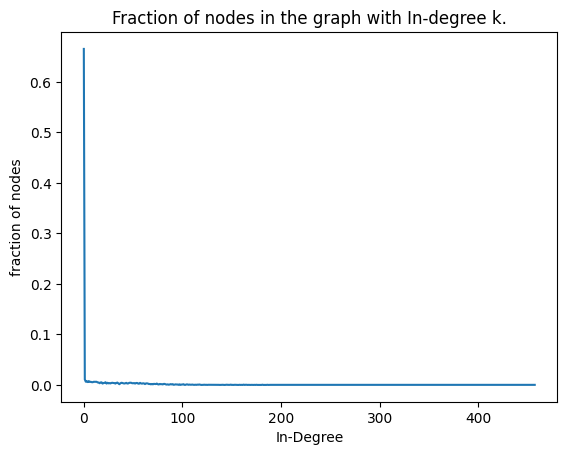

In [26]:
x = [i for i in range(max(in_degree.values())+1)]
y = []
for value in x:
    nodes_with_indegree_value = list(in_degree.values()).count(value)
    fraction_with_indegree_value = float(nodes_with_indegree_value) / float(num_of_nodes)
    y.append(fraction_with_indegree_value)
    
plt.xlabel('In-Degree')
plt.ylabel('fraction of nodes')
plt.title("Fraction of nodes in the graph with In-degree k.")
plt.plot(x,y)
plt.show()

### Out-degree distribution of the network

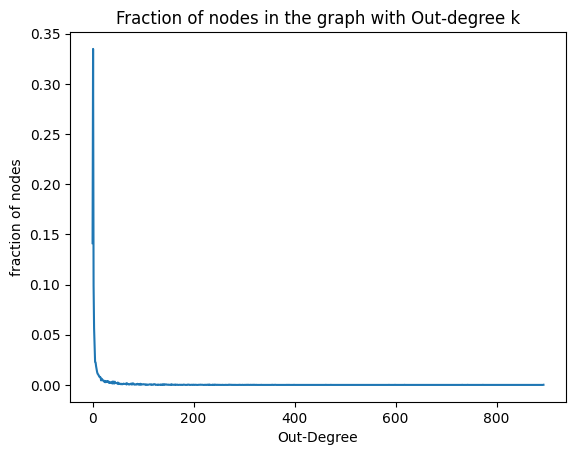

In [27]:
x = [i for i in range(max(out_degree.values())+1)]
y = []
for value in x:
    nodes_with_outdegree_value = list(out_degree.values()).count(value)
    fraction_with_outdegree_value = float(nodes_with_outdegree_value) / float(num_of_nodes)
    y.append(fraction_with_outdegree_value)
    
plt.xlabel('Out-Degree')
plt.ylabel('fraction of nodes')
plt.title("Fraction of nodes in the graph with Out-degree k")
plt.plot(x,y)
plt.show()

### Clustering-coefficient distribution

In [67]:
def get_neighbours(node):
    neighbours = []
    node_list = adj_matrix.columns
    for i, value in enumerate(adj_matrix.loc[node]):
        if value == 1:
            neighbours.append(node_list[i])
    return neighbours

def LCC(node):
    count = 0
    neighbours = get_neighbours(node)   
    if len(neighbours) < 2:
        return 0
    for ni in neighbours:
        current_neighbours = get_neighbours(ni)
        for nj in neighbours:
            if nj in current_neighbours:
                count+=1
    return float(count) / float(((len(neighbours))*(len(neighbours)-1)))



In [48]:
LCC_dict = {}
for node in adj_matrix.columns:
    LCC_dict[node] = LCC(node)
print(LCC_dict)

{3: 0.07509881422924901, 4: 0.13669950738916256, 5: 0.191699604743083, 6: 0.030659391432531737, 7: 0.09239130434782608, 8: 0.04319713435735535, 9: 0.05416666666666667, 10: 0.06757865937072503, 11: 0.02612160941473519, 12: 0.051201923076923075, 13: 0.11818181818181818, 14: 0.030740568234746156, 15: 0.06693877551020408, 16: 0.11904761904761904, 17: 0.08787878787878788, 18: 0.12878787878787878, 19: 0.1106612685560054, 20: 0.03306307860387557, 21: 0.030526315789473683, 22: 0.0, 23: 0.05368382080710848, 24: 0.04190308073803219, 25: 0.10074906367041199, 26: 0.060582306830907054, 27: 0.03805086390992041, 28: 0.05639097744360902, 29: 0.03923937360178971, 30: 0.05, 31: 0.05238095238095238, 32: 0.0, 33: 0.09239130434782608, 34: 0.45, 35: 0.03461538461538462, 36: 0.049471755487115514, 37: 0.06842105263157895, 38: 0.1043956043956044, 39: 0.13048780487804879, 40: 0.09090909090909091, 41: 0.07241379310344828, 42: 0.03677221654749745, 43: 0.08333333333333333, 44: 0.0354122621564482, 45: 0.16071428571

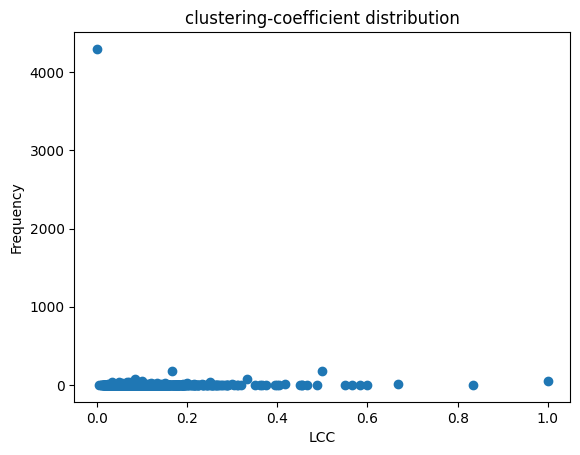

In [94]:
LCCs = sorted(list(LCC_dict.values()))
x = list(set(LCCs))
y = [LCCs.count(val) for val in x]

plt.xlabel('LCC')
plt.ylabel('Frequency')
plt.title("clustering-coefficient distribution")
plt.scatter(x,y)
plt.show()

In [82]:
print(LCC_dict)

{3: 0.07509881422924901, 4: 0.13669950738916256, 5: 0.191699604743083, 6: 0.030659391432531737, 7: 0.09239130434782608, 8: 0.04319713435735535, 9: 0.05416666666666667, 10: 0.06757865937072503, 11: 0.02612160941473519, 12: 0.051201923076923075, 13: 0.11818181818181818, 14: 0.030740568234746156, 15: 0.06693877551020408, 16: 0.11904761904761904, 17: 0.08787878787878788, 18: 0.12878787878787878, 19: 0.1106612685560054, 20: 0.03306307860387557, 21: 0.030526315789473683, 22: 0.0, 23: 0.05368382080710848, 24: 0.04190308073803219, 25: 0.10074906367041199, 26: 0.060582306830907054, 27: 0.03805086390992041, 28: 0.05639097744360902, 29: 0.03923937360178971, 30: 0.05, 31: 0.05238095238095238, 32: 0.0, 33: 0.09239130434782608, 34: 0.45, 35: 0.03461538461538462, 36: 0.049471755487115514, 37: 0.06842105263157895, 38: 0.1043956043956044, 39: 0.13048780487804879, 40: 0.09090909090909091, 41: 0.07241379310344828, 42: 0.03677221654749745, 43: 0.08333333333333333, 44: 0.0354122621564482, 45: 0.16071428571